In [ ]:
pip install google_play_scraper

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp36-none-any.whl size=22280 sha256=0920adb061ca8e2d1ca08946aca2254e30f9c13aaada294c1819a5f668dd8aa2
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.1-cp36-cp36m-linux_x86_64.whl size=149180 sha256=3b2c635baa7db6aa6ed52c8c8a1a1dfc106af94fd12407de70e2f418fa0ae59a
  Stored in directory: /root/.cache/pip/wheels/ae/69/ea/4798f98317cbab35d78fea64d36bd7b2b18faca88568ef15b0
Successfully built python-levenshtein


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=e00fb96a796e6ac91e795efe46ca24544b4f28db93432c1e53cc23a22889fd20
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm
import emoji
from gensim.parsing.preprocessing import remove_stopwords
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews('com.indiaBulls',lang='en',country='us',sort=Sort.NEWEST,count=80000)

In [ ]:
df=pd.DataFrame.from_dict(result)
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt'],axis=1,inplace=True)
df.head()

,content,score,at
0,Ford Application I am order the card but card ...,1,2021-01-21 12:05:31
1,Nice,5,2021-01-21 12:04:55
2,When I am activating my digital card it showin...,1,2021-01-21 12:04:06
3,Very very worst.app is dead slow.i tried all t...,1,2021-01-21 12:01:40
4,Time waste annesary I applied loan but they di...,5,2021-01-21 11:59:08


In [ ]:
df.sort_values(by='at')

,content,score,at
79999,401 this loan app has very user friendly envir...,5,2020-09-03 14:38:35
79998,One of the best application for dhani credit l...,5,2020-09-03 14:39:41
79997,main iss app ko apne sare dosthon ko recommend...,5,2020-09-03 14:39:54
79996,this is a best application for instant persona...,5,2020-09-03 14:40:29
79995,Not given credit they are playing games only N...,1,2020-09-03 14:40:36
...,...,...,...
4,Time waste annesary I applied loan but they di...,5,2021-01-21 11:59:08
3,Very very worst.app is dead slow.i tried all t...,1,2021-01-21 12:01:40
2,When I am activating my digital card it showin...,1,2021-01-21 12:04:06
1,Nice,5,2021-01-21 12:04:55


In [ ]:
df=df.iloc[:63027]

In [ ]:
import datetime

In [ ]:
x=datetime.datetime(2020,9,21)

In [ ]:
y=datetime.datetime.now()

In [ ]:
y-x

datetime.timedelta(122, 44512, 957680)

In [ ]:
df=df.loc[df['at']>x]

In [ ]:
from google.colab import files
df.to_csv('Dhani_4months_21-01-21.csv')
files.download('Dhani_4months_21-01-21.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.drop('at',axis=1,inplace=True)

In [ ]:
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

,content,score,cleaned
0,Ford Application I am order the card but card ...,1,ford application order card card receive accou...
1,Nice,5,nice
2,When I am activating my digital card it showin...,1,activating digital card showing activated
3,Very very worst.app is dead slow.i tried all t...,1,worstapp dead slowi tried transactions wrongso...
4,Time waste annesary I applied loan but they di...,5,time waste annesary applied loan didn't given ...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
print(sia.polarity_scores(df.content[0]))

{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.631}


In [ ]:
print(sia.polarity_scores(df.cleaned[0]))

{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4767}


In [ ]:
df.content[0]

"Ford Application I am order the card but card not receive and my account detection money daily fake Application don't west you're time and money"

In [ ]:
df.cleaned[0]

"ford application order card card receive account detection money daily fake application don't west you're time money"

In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex

100%|██████████| 63027/63027 [01:48<00:00, 582.27it/s]


In [ ]:
df.head()

,content,score,cleaned,word__vec
0,Ford Application I am order the card but card ...,1,ford application order card card receive accou...,"[ford, application, order, card, card, receive..."
1,Nice,5,nice,[nice]
2,When I am activating my digital card it showin...,1,activating digital card showing activated,"[activate, digital, card, show, activate]"
3,Very very worst.app is dead slow.i tried all t...,1,worstapp dead slowi tried transactions wrongso...,"[worstapp, dead, slowi, try, transaction, wron..."
4,Time waste annesary I applied loan but they di...,5,time waste annesary applied loan didn't given ...,"[time, waste, annesary, apply, loan, do, n't, ..."


In [ ]:
df.to_csv('Dhani_4months_2021-01-21 18:16:08.csv')
files.download('Dhani_4months_2021-01-21 18:16:08.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1

100%|██████████| 63027/63027 [00:00<00:00, 1529881.81it/s]


In [ ]:
total=count

In [ ]:
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)

In [ ]:
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

[('low', 0.9574835300445557),
 ('benefit', 0.9437645077705383),
 ('small', 0.9419081211090088),
 ('equal', 0.9418482780456543),
 ('actually', 0.9386075735092163),
 ('percent', 0.938413143157959),
 ('increase', 0.93646240234375),
 ('borrow', 0.9262222051620483),
 ('include', 0.9223841428756714),
 ('authority', 0.919877290725708),
 ('tat', 0.9185216426849365),
 ('offer', 0.9185155630111694),
 ('buy', 0.9173914194107056),
 ('damage', 0.9165424108505249),
 ('cost', 0.9159377813339233),
 ('offering', 0.9152437448501587),
 ('maximum', 0.9112097024917603),
 ('chrges', 0.9109912514686584),
 ('scheme', 0.9109237194061279),
 ('truly', 0.9099428653717041),
 ('period', 0.9097855091094971),
 ('disbursement', 0.9084566235542297),
 ('huge', 0.9061603546142578),
 ('save', 0.9041823148727417),
 ('intereste', 0.9040333032608032),
 ('join', 0.9038360118865967),
 ('relief', 0.9037396907806396),
 ('beat', 0.9029327630996704),
 ('loose', 0.9013119339942932),
 ('suppose', 0.901219367980957),
 ('instalmentaly

100%|██████████| 63027/63027 [00:16<00:00, 3742.07it/s]



 912
0.039929947460595444
{'neg': 0.162, 'neu': 0.616, 'pos': 0.222, 'compound': 1.0}


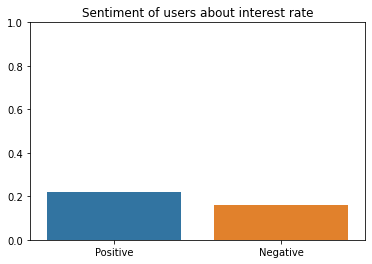

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

In [ ]:
print(dic)

{'neg': 0.162, 'neu': 0.615, 'pos': 0.223, 'compound': 1.0}


In [ ]:
t=63027

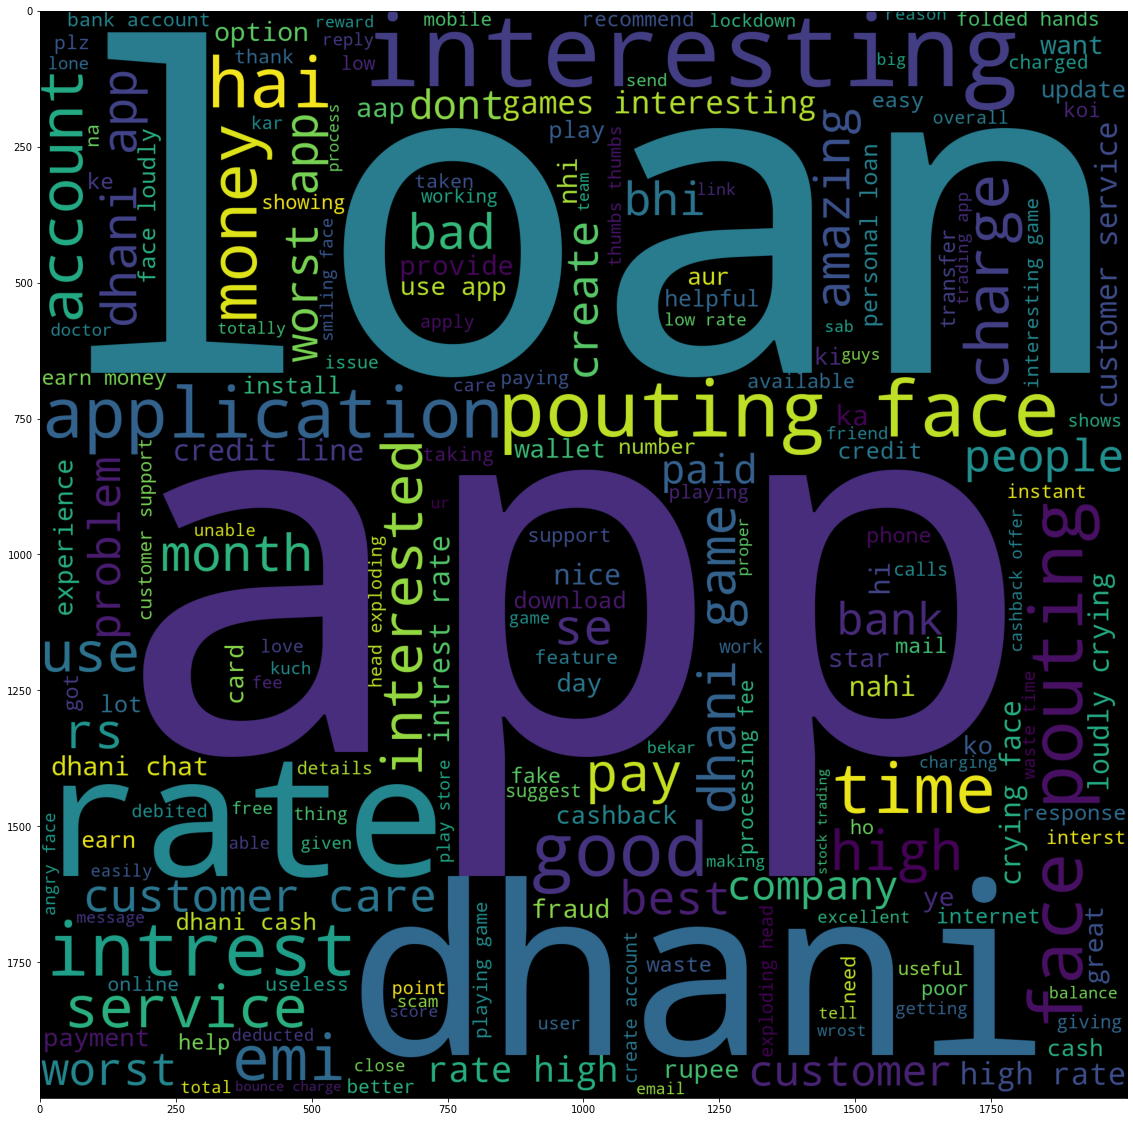

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A1)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 63027/63027 [00:18<00:00, 3391.84it/s]


912 2456
2.692982456140351


([<matplotlib.patches.Wedge at 0x7fc714e4bf28>,
 [Text(-0.1330533667571608, 1.0919234412698469, ''),
  Text(0.1330534689904113, -1.0919234288124868, '')])

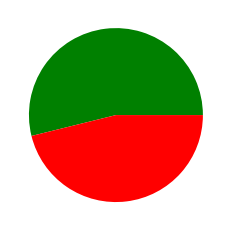

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 63027/63027 [00:17<00:00, 3601.01it/s]

898 2414
2.6881959910913142


([<matplotlib.patches.Wedge at 0x7fc714b9def0>,
 [Text(-0.1297688334975435, 1.0923186576510935, ''),
  Text(0.12976883349754362, -1.0923186576510935, '')])

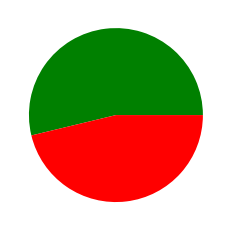

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

In [ ]:
len(li_A1)

912

598 372


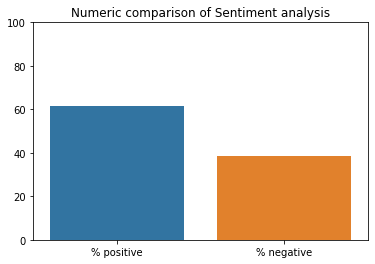

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

55
82
8
[37.93103448275862, 56.55172413793104, 5.517241379310345]


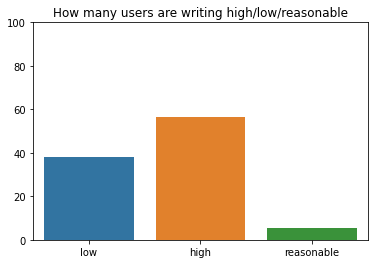

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

In [ ]:
wwv.wv.most_similar(positive=['emi'],topn=40)

[('date', 0.9568709135055542),
 ('overdue', 0.9523359537124634),
 ('paid', 0.9312371611595154),
 ('due', 0.9250185489654541),
 ('payment', 0.9192085266113281),
 ('month', 0.9172780513763428),
 ('december', 0.9129757881164551),
 ('th', 0.910598874092102),
 ('auto', 0.9100672602653503),
 ('manually', 0.9049302935600281),
 ('penalty', 0.9013926982879639),
 ('clear', 0.9013282656669617),
 ('pay', 0.9007666110992432),
 ('emis', 0.9002993106842041),
 ('bounce', 0.8988810777664185),
 ('pending', 0.8958941698074341),
 ('extra', 0.8898115158081055),
 ('twice', 0.8853063583374023),
 ('ec', 0.8806236982345581),
 ('january', 0.8798768520355225),
 ('overdues', 0.8794905543327332),
 ('charge', 0.8793880939483643),
 ('foreclose', 0.8793197870254517),
 ('return', 0.8748500943183899),
 ('jodte', 0.8723973035812378),
 ('cheque', 0.8720905780792236),
 ('remain', 0.8704698085784912),
 ('payed', 0.867572546005249),
 ('apart', 0.8652567863464355),
 ('clearing', 0.8650393486022949),
 ('paemt', 0.864729225635

100%|██████████| 63027/63027 [00:17<00:00, 3681.00it/s]



 1604
0.0702276707530648
{'neg': 0.177, 'neu': 0.713, 'pos': 0.11, 'compound': -1.0}


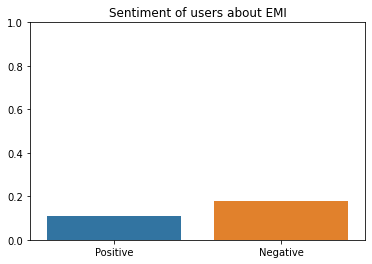

In [ ]:
# from fuzzywuzzy import fuzz
# from nltk.tokenize import word_tokenize
# ind=0
# count=0
# review_about_A2=''
# li_A2=[]
# for sent in tqdm(df['cleaned']):
#   sent=str(sent)
#   toks=word_tokenize(sent)
#   if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
#     ind=1
#   for tok in toks:
#     if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('overdue',tok)>90) :
#       ind=1
#   if ind==1:
#     count+=1
#     review_about_A2=review_about_A2+sent+' '
#     li_A2.append(sent)
#   ind=0

# print('\n',count)
# print(count/total)
# dic=sia.polarity_scores(review_about_A2)
# print(dic)
# values=[dic['pos'],dic['neg']]
# keys=['Positive','Negative']
# g=sns.barplot(x=keys,y=values)
# g.set(ylim=(0,1))
# plt.title('Sentiment of users about EMI')
# plt.show()

100%|██████████| 63027/63027 [00:16<00:00, 3710.82it/s]



 1528
0.06690017513134851
{'neg': 0.171, 'neu': 0.708, 'pos': 0.121, 'compound': -1.0}


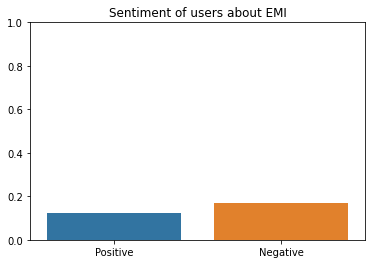

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  # if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
  #   ind=1
  for tok in toks:
    if (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0
li_A2

100%|██████████| 63027/63027 [00:07<00:00, 8052.92it/s]


["worst app customer care executives making foolish customer paid foreclose december showing active day yesterday guys tell told outstanding showing can't forclosed account pay close payment showing active hear listen concern days gone don't loan class appplease don't open app loan guys fraud",
 'outstanding mind blowing fantastic wosome dhani',
 'fraud app worst appi pay days date repay penalty rs twice outstanding customer care paid ur days cut rs acount dont know class app gave star possible worst app worst customer care thumbs thumbs thumbs thumbs thumbs',
 'paid dec outstanding incresing customer service said tecnical issue evry time right mail said tack time working thatits alrady day payment',
 'loan app reflected outstanding ivl finance credit reports payments august updated credit reports',
 'outstanding',
 'loan cleared sent details recovery team email whatsapp showing outstanding proper response complaint raised email calls somebody pouting face pouting face pouting face',
 

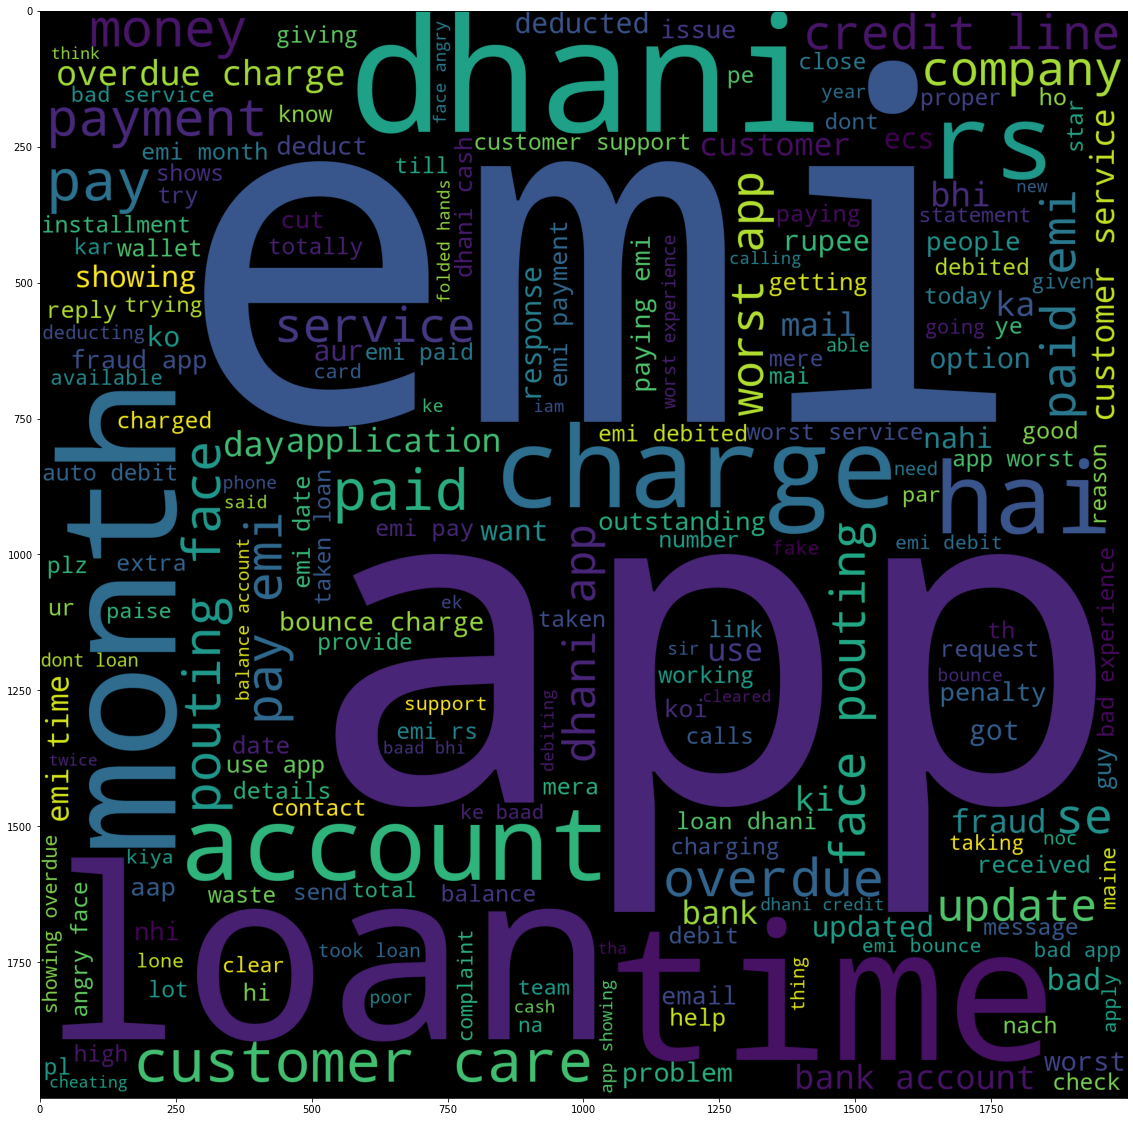

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A2)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  # if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
  #   ind=1
  for tok in toks:
    if (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0
li_A2

100%|██████████| 63027/63027 [00:07<00:00, 8161.60it/s]


["hello waste indiabulla dhani loan emi debited today work good polite illigal fraud thiings okay mind itt pouting face pouting face pouting face pouting face pouting face pouting face pouting face pouting face pouting face dear friends completely fraud don't loan iam paid interests bounce charges bluddy don't cheet poor peoples company big criminal company emi debited proper solve problem immediately pouting face pouting face pouting face pouting face pouting face pouting face pouting face bluddy idiots rascals properly",
 'fraud app use app looting u r money nach bounce cahrges service fraudpls remove playstore app',
 'years customer bounces credit line given pid monthes limit opened freedom card errro shows address column rectified simply waste customer serviceand problem solving',
 'emi complete timely debit ac emi bounce bounce bounce',
 "past month debited bank account reason paid emi time taking cheque bounce charges n tdy morning debited customer service u people king beggar ta



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 229/63027 [00:00<00:27, 2287.33it/s]

  1%|          | 495/63027 [00:00<00:26, 2384.40it/s]

  1%|          | 755/63027 [00:00<00:25, 2442.31it/s]

  2%|▏         | 1047/63027 [00:00<00:24, 2567.44it/s]

  2%|▏         | 1292/63027 [00:00<00:24, 2525.68it/s]

  2%|▏         | 1571/63027 [00:00<00:23, 2599.01it/s]

  3%|▎         | 1840/63027 [00:00<00:23, 2624.97it/s]

  3%|▎         | 2086/63027 [00:00<00:23, 2570.45it/s]

  4%|▎         | 2332/63027 [00:00<00:24, 2515.12it/s]

  4%|▍         | 2611/63027 [00:01<00:23, 2590.53it/s]

  5%|▍         | 2893/63027 [00:01<00:22, 2654.52it/s]

  5%|▌         | 3156/63027 [00:01<00:22, 2643.14it/s]

  5%|▌         | 3462/63027 [00:01<00:21, 2755.03it/s]

  6%|▌         | 3750/63027 [00:01<00:21, 2790.87it/s]

  6%|▋         | 4029/63027 [00:01<00:21, 2748.38it/s]

  7%|▋         | 4304/63027 [00:01<00:21, 2748.55it/s]

  7%|▋         | 4579/63027 [00:01<00:21, 2707.12it/s]

  8%|▊

1528 2311
1.512434554973822


([<matplotlib.patches.Wedge at 0x7fc714dca940>,
 [Text(0.6395912605575038, 0.8949430257946387, ''),
  Text(-0.6395911767668876, -0.8949430856774905, '')])

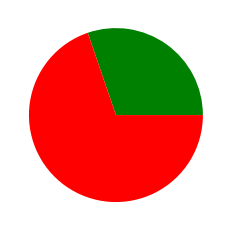

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])



  0%|          | 0/1528 [00:00<?, ?it/s]

 18%|█▊        | 271/1528 [00:00<00:00, 2702.38it/s]

 37%|███▋      | 562/1528 [00:00<00:00, 2760.56it/s]

 54%|█████▍    | 831/1528 [00:00<00:00, 2733.62it/s]

 74%|███████▍  | 1137/1528 [00:00<00:00, 2823.50it/s]

100%|██████████| 1528/1528 [00:00<00:00, 2894.86it/s]


1009 1165


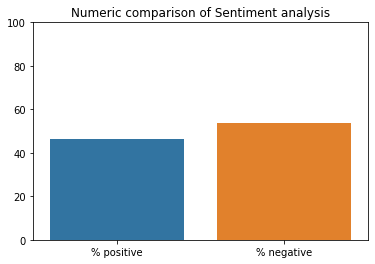

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 168/63027 [00:00<00:37, 1679.08it/s]

  1%|          | 370/63027 [00:00<00:35, 1766.81it/s]

  1%|          | 571/63027 [00:00<00:34, 1832.85it/s]

  1%|          | 763/63027 [00:00<00:33, 1856.54it/s]

  2%|▏         | 961/63027 [00:00<00:32, 1891.31it/s]

  2%|▏         | 1155/63027 [00:00<00:32, 1904.88it/s]

  2%|▏         | 1327/63027 [00:00<00:33, 1825.63it/s]

  2%|▏         | 1513/63027 [00:00<00:33, 1833.72it/s]

  3%|▎         | 1715/63027 [00:00<00:32, 1885.35it/s]

  3%|▎         | 1898/63027 [00:01<00:33, 1843.46it/s]

  3%|▎         | 2079/63027 [00:01<00:34, 1777.74it/s]

  4%|▎         | 2256/63027 [00:01<00:34, 1774.17it/s]

  4%|▍         | 2465/63027 [00:01<00:32, 1855.92it/s]

  4%|▍         | 2666/63027 [00:01<00:31, 1891.60it/s]

  5%|▍         | 2892/63027 [00:01<00:30, 1987.71it/s]

  5%|▍         | 3093/63027 [00:01<00:30, 1942.49it/s]

  5%|▌         | 3294/63027 [00:01<00:30, 1955.43it/s]

  6%|▌  


 397
0.017381786339754818
{'neg': 0.211, 'neu': 0.628, 'pos': 0.162, 'compound': -0.9999}


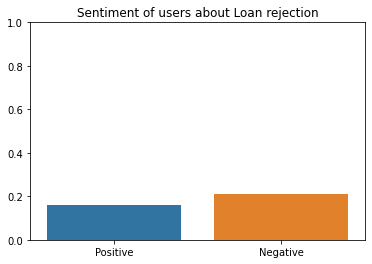

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

In [ ]:
wwv.wv.most_similar(positive=['loyal','regular'],topn=40)

[('actual', 0.9861171841621399),
 ('unprofessional', 0.9778578877449036),
 ('robbed', 0.9777168035507202),
 ('forum', 0.9768694043159485),
 ('rule', 0.9763126373291016),
 ('afterall', 0.9761743545532227),
 ('experienced', 0.9756842255592346),
 ('cause', 0.974899411201477),
 ('corona', 0.9747799038887024),
 ('decide', 0.9745970368385315),
 ('word', 0.9745434522628784),
 ('wont', 0.9736043810844421),
 ('language', 0.9734548330307007),
 ('default', 0.9731553792953491),
 ('cci', 0.9727818965911865),
 ('info', 0.9727051854133606),
 ('term', 0.972316324710846),
 ('rarely', 0.9722468852996826),
 ('place', 0.9722416400909424),
 ('coz', 0.9718778729438782),
 ('unethical', 0.9717917442321777),
 ('bunch', 0.9717298746109009),
 ('half', 0.9712467789649963),
 ('officer', 0.97090744972229),
 ('focus', 0.9701957702636719),
 ('large', 0.9700488448143005),
 ('dwnload', 0.9697895050048828),
 ('commit', 0.9695929288864136),
 ('assist', 0.9693466424942017),
 ('away', 0.9691614508628845),
 ('t', 0.96893656

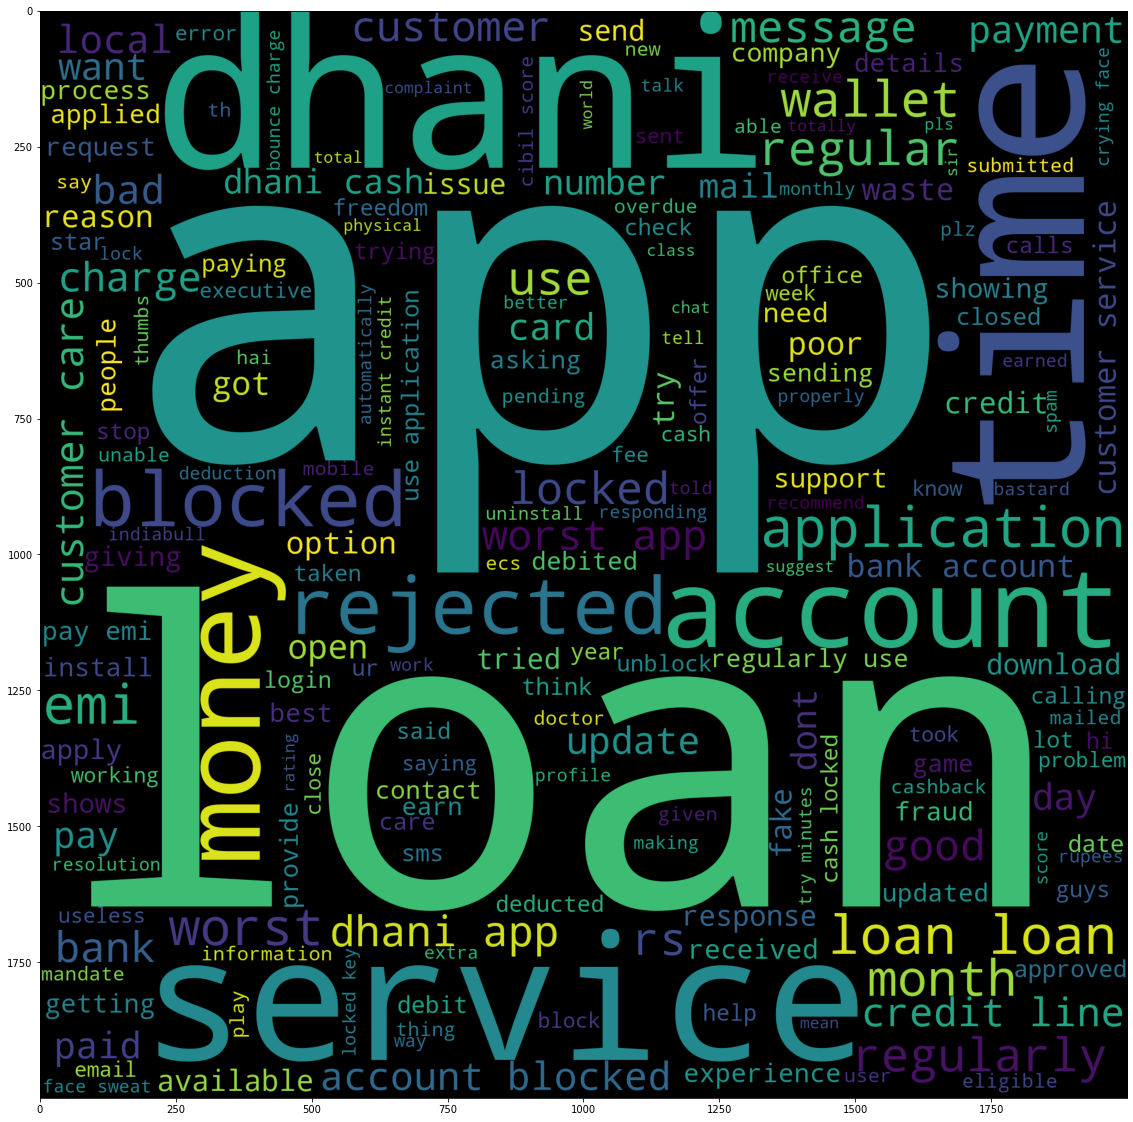

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A3)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 167/63027 [00:00<00:37, 1660.17it/s]

  1%|          | 344/63027 [00:00<00:37, 1691.41it/s]

  1%|          | 513/63027 [00:00<00:36, 1689.82it/s]

  1%|          | 681/63027 [00:00<00:36, 1685.57it/s]

  1%|▏         | 839/63027 [00:00<00:37, 1651.86it/s]

  2%|▏         | 1015/63027 [00:00<00:36, 1682.80it/s]

  2%|▏         | 1196/63027 [00:00<00:36, 1705.43it/s]

  2%|▏         | 1359/63027 [00:00<00:36, 1677.79it/s]

  2%|▏         | 1526/63027 [00:00<00:36, 1673.23it/s]

  3%|▎         | 1721/63027 [00:01<00:35, 1747.19it/s]

  3%|▎         | 1893/63027 [00:01<00:35, 1729.01it/s]

  3%|▎         | 2064/63027 [00:01<00:35, 1695.80it/s]

  4%|▎         | 2232/63027 [00:01<00:36, 1653.41it/s]

  4%|▍         | 2424/63027 [00:01<00:35, 1723.71it/s]

  4%|▍         | 2612/63027 [00:01<00:34, 1767.14it/s]

  4%|▍         | 2810/63027 [00:01<00:32, 1825.98it/s]

  5%|▍         | 2997/63027 [00:01<00:32, 1837.24it/s]

  5%|▌  

397 879
2.2141057934508814


([<matplotlib.patches.Wedge at 0x7fc71493cdd8>,
 [Text(0.19653488200396882, 1.082300346556207, ''),
  Text(-0.19653478067169627, -1.0823003649571261, '')])

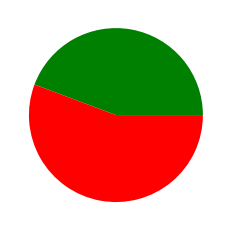

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])



100%|██████████| 397/397 [00:00<00:00, 5435.63it/s]

173 216


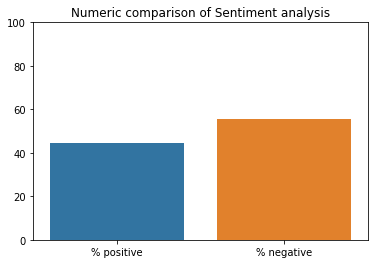

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 173/63027 [00:00<00:36, 1727.18it/s]

  1%|          | 412/63027 [00:00<00:33, 1879.52it/s]

  1%|          | 677/63027 [00:00<00:30, 2049.45it/s]

  1%|▏         | 886/63027 [00:00<00:30, 2061.08it/s]

  2%|▏         | 1145/63027 [00:00<00:28, 2195.06it/s]

  2%|▏         | 1345/63027 [00:00<00:28, 2131.49it/s]

  3%|▎         | 1600/63027 [00:00<00:27, 2240.68it/s]

  3%|▎         | 1833/63027 [00:00<00:27, 2265.73it/s]

  3%|▎         | 2053/63027 [00:00<00:27, 2192.78it/s]

  4%|▎         | 2269/63027 [00:01<00:27, 2182.46it/s]

  4%|▍         | 2522/63027 [00:01<00:26, 2275.80it/s]

  4%|▍         | 2767/63027 [00:01<00:25, 2324.99it/s]

  5%|▍         | 3013/63027 [00:01<00:25, 2356.83it/s]

  5%|▌         | 3249/63027 [00:01<00:26, 2263.45it/s]

  6%|▌         | 3486/63027 [00:01<00:25, 2293.00it/s]

  6%|▌         | 3742/63027 [00:01<00:25, 2365.66it/s]

  6%|▋         | 3981/63027 [00:01<00:24, 2372.63it/s]

  7%|▋ 


 6627
0.29014886164623466
{'neg': 0.16, 'neu': 0.59, 'pos': 0.25, 'compound': 1.0}


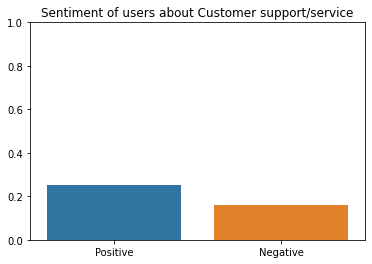

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 167/63027 [00:00<00:37, 1663.42it/s]

  1%|          | 369/63027 [00:00<00:35, 1756.16it/s]

  1%|          | 576/63027 [00:00<00:33, 1839.48it/s]

  1%|          | 776/63027 [00:00<00:33, 1883.17it/s]

  1%|▏         | 945/63027 [00:00<00:34, 1819.98it/s]

  2%|▏         | 1159/63027 [00:00<00:32, 1903.70it/s]

  2%|▏         | 1344/63027 [00:00<00:32, 1886.42it/s]

  2%|▏         | 1542/63027 [00:00<00:32, 1912.72it/s]

  3%|▎         | 1725/63027 [00:00<00:33, 1824.74it/s]

  3%|▎         | 1909/63027 [00:01<00:33, 1825.63it/s]

  3%|▎         | 2089/63027 [00:01<00:34, 1760.09it/s]

  4%|▎         | 2264/63027 [00:01<00:34, 1753.38it/s]

  4%|▍         | 2487/63027 [00:01<00:32, 1872.66it/s]

  4%|▍         | 2676/63027 [00:01<00:32, 1859.67it/s]

  5%|▍         | 2866/63027 [00:01<00:32, 1870.87it/s]

  5%|▍         | 3057/63027 [00:01<00:31, 1882.17it/s]

  5%|▌         | 3253/63027 [00:01<00:31, 1902.74it/s]

  6%|▌  


 15944 6627
2.4059151954127054


([<matplotlib.patches.Wedge at 0x7fc7142d82b0>,
 [Text(0.06498883678353728, 1.0980785268338158, ''),
  Text(-0.06498883678353742, -1.0980785268338158, '')])

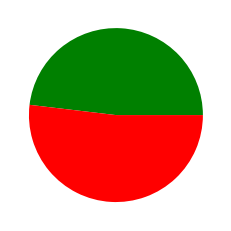

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

5251 3650


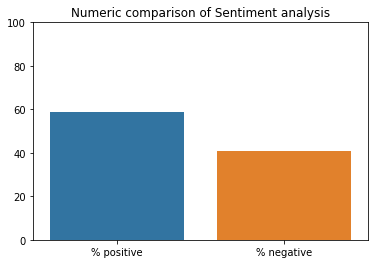

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

In [ ]:
total

22840



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 114/63027 [00:00<00:56, 1108.36it/s]

  0%|          | 244/63027 [00:00<00:54, 1158.26it/s]

  1%|          | 385/63027 [00:00<00:51, 1223.35it/s]

  1%|          | 542/63027 [00:00<00:47, 1308.18it/s]

  1%|          | 694/63027 [00:00<00:45, 1364.80it/s]

  1%|▏         | 847/63027 [00:00<00:44, 1409.95it/s]

  2%|▏         | 1004/63027 [00:00<00:42, 1454.10it/s]

  2%|▏         | 1157/63027 [00:00<00:41, 1475.43it/s]

  2%|▏         | 1300/63027 [00:00<00:45, 1354.50it/s]

  2%|▏         | 1439/63027 [00:01<00:45, 1363.72it/s]

  3%|▎         | 1598/63027 [00:01<00:43, 1422.77it/s]

  3%|▎         | 1751/63027 [00:01<00:42, 1444.40it/s]

  3%|▎         | 1896/63027 [00:01<00:46, 1325.67it/s]

  3%|▎         | 2031/63027 [00:01<00:49, 1235.17it/s]

  3%|▎         | 2158/63027 [00:01<00:51, 1180.26it/s]

  4%|▎         | 2308/63027 [00:01<00:48, 1260.59it/s]

  4%|▍         | 2465/63027 [00:01<00:45, 1330.49it/s]

  4%|▍   


 3407 0.14916812609457092


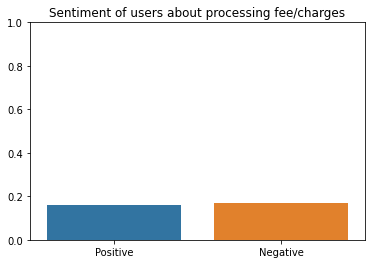

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A6)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/charges')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 118/63027 [00:00<00:53, 1177.54it/s]

  0%|          | 244/63027 [00:00<00:52, 1200.94it/s]

  1%|          | 383/63027 [00:00<00:50, 1251.05it/s]

  1%|          | 536/63027 [00:00<00:47, 1322.98it/s]

  1%|          | 686/63027 [00:00<00:45, 1370.23it/s]

  1%|▏         | 826/63027 [00:00<00:45, 1375.54it/s]

  2%|▏         | 982/63027 [00:00<00:43, 1420.87it/s]

  2%|▏         | 1140/63027 [00:00<00:42, 1463.39it/s]

  2%|▏         | 1281/63027 [00:00<00:47, 1306.31it/s]

  2%|▏         | 1411/63027 [00:01<00:47, 1287.65it/s]

  2%|▏         | 1572/63027 [00:01<00:45, 1365.29it/s]

  3%|▎         | 1719/63027 [00:01<00:43, 1394.40it/s]

  3%|▎         | 1860/63027 [00:01<00:45, 1341.98it/s]

  3%|▎         | 1996/63027 [00:01<00:47, 1283.80it/s]

  3%|▎         | 2126/63027 [00:01<00:49, 1231.52it/s]

  4%|▎         | 2251/63027 [00:01<00:50, 1210.45it/s]

  4%|▍         | 2401/63027 [00:01<00:47, 1284.71it/s]

  4%|▍    


 1.8221309069562666


([<matplotlib.patches.Wedge at 0x7fc713658ba8>,
 [Text(0.4544723028726609, 1.0017259734686033, ''),
  Text(-0.4544723028726608, -1.0017259734686033, '')])

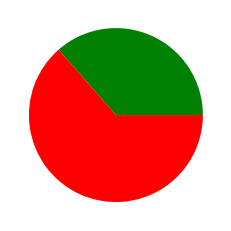

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

2209 2315


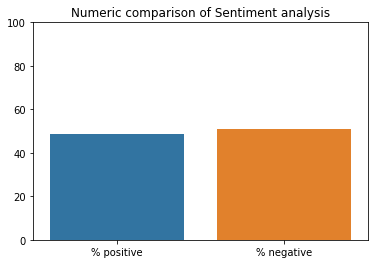

In [ ]:
pos,neg=0,0
for sent in li_A6:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 109/63027 [00:00<00:58, 1082.03it/s]

  0%|          | 244/63027 [00:00<00:54, 1147.93it/s]

  1%|          | 403/63027 [00:00<00:50, 1252.29it/s]

  1%|          | 590/63027 [00:00<00:44, 1388.74it/s]

  1%|          | 747/63027 [00:00<00:43, 1436.21it/s]

  1%|▏         | 925/63027 [00:00<00:40, 1524.22it/s]

  2%|▏         | 1102/63027 [00:00<00:39, 1587.34it/s]

  2%|▏         | 1257/63027 [00:00<00:40, 1515.69it/s]

  2%|▏         | 1407/63027 [00:00<00:42, 1441.29it/s]

  3%|▎         | 1601/63027 [00:01<00:39, 1560.87it/s]

  3%|▎         | 1782/63027 [00:01<00:37, 1615.77it/s]

  3%|▎         | 1946/63027 [00:01<00:39, 1531.60it/s]

  3%|▎         | 2102/63027 [00:01<00:42, 1417.52it/s]

  4%|▎         | 2259/63027 [00:01<00:41, 1459.63it/s]

  4%|▍         | 2434/63027 [00:01<00:39, 1534.50it/s]

  4%|▍         | 2596/63027 [00:01<00:38, 1558.95it/s]

  4%|▍         | 2794/63027 [00:01<00:36, 1664.38it/s]

  5%|▍   


 4703 0.2059106830122592


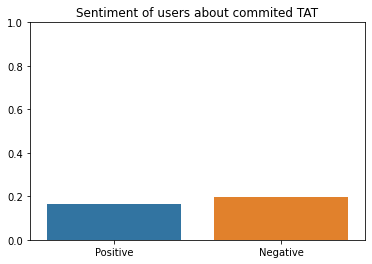

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 140/63027 [00:00<00:44, 1398.49it/s]

  0%|          | 268/63027 [00:00<00:46, 1360.04it/s]

  1%|          | 419/63027 [00:00<00:44, 1397.84it/s]

  1%|          | 609/63027 [00:00<00:41, 1516.78it/s]

  1%|          | 744/63027 [00:00<00:42, 1457.33it/s]

  1%|▏         | 886/63027 [00:00<00:42, 1445.42it/s]

  2%|▏         | 1056/63027 [00:00<00:41, 1509.64it/s]

  2%|▏         | 1198/63027 [00:00<00:42, 1446.27it/s]

  2%|▏         | 1337/63027 [00:00<00:43, 1425.42it/s]

  2%|▏         | 1495/63027 [00:01<00:41, 1468.40it/s]

  3%|▎         | 1676/63027 [00:01<00:39, 1549.13it/s]

  3%|▎         | 1831/63027 [00:01<00:40, 1529.12it/s]

  3%|▎         | 1984/63027 [00:01<00:41, 1465.51it/s]

  3%|▎         | 2131/63027 [00:01<00:44, 1379.08it/s]

  4%|▎         | 2276/63027 [00:01<00:43, 1399.40it/s]

  4%|▍         | 2426/63027 [00:01<00:42, 1425.29it/s]

  4%|▍         | 2586/63027 [00:01<00:41, 1473.19it/s]

  4%|▍   


 4703 1.7758877312353816


([<matplotlib.patches.Wedge at 0x7fc713762630>,
 [Text(0.4833820052461701, 0.9881001148690307, ''),
  Text(-0.48338191273355896, -0.9881001601265159, '')])

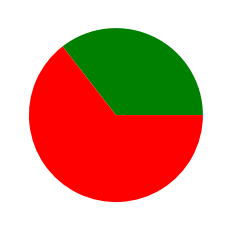

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

In [ ]:
count/total

0.2059106830122592

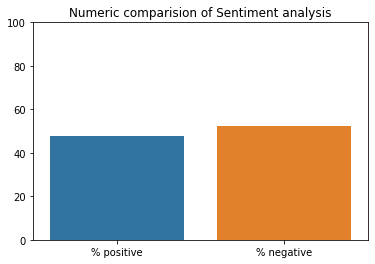

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 171/63027 [00:00<00:36, 1705.17it/s]

  1%|          | 373/63027 [00:00<00:35, 1780.98it/s]

  1%|          | 595/63027 [00:00<00:32, 1893.13it/s]

  1%|          | 787/63027 [00:00<00:32, 1896.24it/s]

  2%|▏         | 997/63027 [00:00<00:31, 1943.08it/s]

  2%|▏         | 1187/63027 [00:00<00:32, 1929.79it/s]

  2%|▏         | 1362/63027 [00:00<00:34, 1811.05it/s]

  2%|▏         | 1565/63027 [00:00<00:32, 1871.60it/s]

  3%|▎         | 1781/63027 [00:00<00:31, 1944.21it/s]

  3%|▎         | 1971/63027 [00:01<00:33, 1838.50it/s]

  3%|▎         | 2153/63027 [00:01<00:35, 1728.99it/s]

  4%|▎         | 2341/63027 [00:01<00:34, 1770.21it/s]

  4%|▍         | 2557/63027 [00:01<00:32, 1871.16it/s]

  4%|▍         | 2757/63027 [00:01<00:31, 1903.78it/s]

  5%|▍         | 2983/63027 [00:01<00:30, 1995.81it/s]

  5%|▌         | 3185/63027 [00:01<00:30, 1933.15it/s]

  5%|▌         | 3400/63027 [00:01<00:30, 1986.47it/s]

  6%|▌  


 5263 0.2304290718038529
{'neg': 0.276, 'neu': 0.578, 'pos': 0.146, 'compound': -1.0}


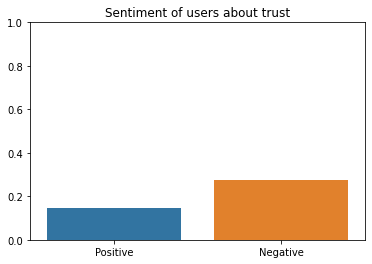

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 155/63027 [00:00<00:40, 1544.78it/s]

  1%|          | 335/63027 [00:00<00:38, 1613.30it/s]

  1%|          | 520/63027 [00:00<00:37, 1674.48it/s]

  1%|          | 709/63027 [00:00<00:35, 1731.73it/s]

  1%|▏         | 898/63027 [00:00<00:35, 1774.00it/s]

  2%|▏         | 1100/63027 [00:00<00:33, 1839.35it/s]

  2%|▏         | 1268/63027 [00:00<00:35, 1725.57it/s]

  2%|▏         | 1436/63027 [00:00<00:36, 1705.64it/s]

  3%|▎         | 1646/63027 [00:00<00:33, 1806.85it/s]

  3%|▎         | 1824/63027 [00:01<00:34, 1782.08it/s]

  3%|▎         | 2000/63027 [00:01<00:36, 1686.36it/s]

  3%|▎         | 2169/63027 [00:01<00:38, 1565.78it/s]

  4%|▎         | 2356/63027 [00:01<00:36, 1645.55it/s]

  4%|▍         | 2549/63027 [00:01<00:35, 1721.33it/s]

  4%|▍         | 2745/63027 [00:01<00:33, 1785.91it/s]

  5%|▍         | 2939/63027 [00:01<00:32, 1828.81it/s]

  5%|▍         | 3124/63027 [00:01<00:33, 1776.74it/s]

  5%|▌  


 5263 1.5149154474634239


([<matplotlib.patches.Wedge at 0x7fc713295a20>,
 [Text(0.6381954541525771, 0.8959389277729739, ''),
  Text(-0.6381954541525772, -0.8959389277729739, '')])

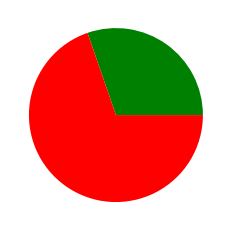

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

2629 4366


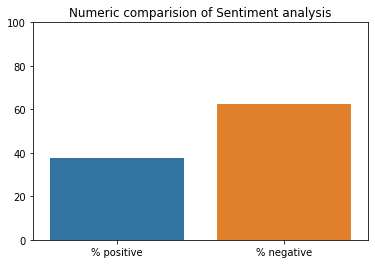

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()




  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 248/63027 [00:00<00:25, 2472.73it/s]

  1%|          | 526/63027 [00:00<00:24, 2557.35it/s]

  1%|▏         | 802/63027 [00:00<00:23, 2610.51it/s]

  2%|▏         | 1074/63027 [00:00<00:23, 2641.93it/s]

  2%|▏         | 1296/63027 [00:00<00:24, 2494.15it/s]

  2%|▏         | 1574/63027 [00:00<00:23, 2573.06it/s]

  3%|▎         | 1837/63027 [00:00<00:23, 2588.29it/s]

  3%|▎         | 2077/63027 [00:00<00:24, 2450.81it/s]

  4%|▎         | 2311/63027 [00:00<00:26, 2319.00it/s]

  4%|▍         | 2582/63027 [00:01<00:24, 2423.45it/s]

  5%|▍         | 2858/63027 [00:01<00:23, 2515.34it/s]

  5%|▍         | 3109/63027 [00:01<00:23, 2509.42it/s]

  5%|▌         | 3390/63027 [00:01<00:23, 2592.30it/s]

  6%|▌         | 3652/63027 [00:01<00:22, 2598.88it/s]

  6%|▌         | 3926/63027 [00:01<00:22, 2638.13it/s]

  7%|▋         | 4201/63027 [00:01<00:22, 2667.25it/s]

  7%|▋         | 4481/63027 [00:01<00:21, 2703.68it/s]

  8%|▊


 802 0.0351138353765324
{'neg': 0.06, 'neu': 0.574, 'pos': 0.366, 'compound': 1.0}


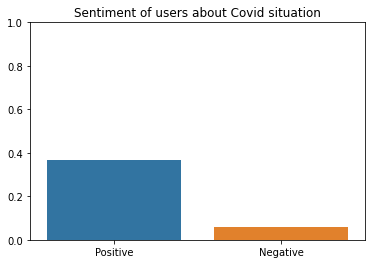

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 



  0%|          | 0/63027 [00:00<?, ?it/s]

  0%|          | 214/63027 [00:00<00:29, 2139.14it/s]

  1%|          | 476/63027 [00:00<00:27, 2262.76it/s]

  1%|          | 744/63027 [00:00<00:26, 2372.97it/s]

  2%|▏         | 1008/63027 [00:00<00:25, 2444.67it/s]

  2%|▏         | 1249/63027 [00:00<00:25, 2432.10it/s]

  2%|▏         | 1491/63027 [00:00<00:25, 2422.46it/s]

  3%|▎         | 1772/63027 [00:00<00:24, 2526.11it/s]

  3%|▎         | 2010/63027 [00:00<00:25, 2377.08it/s]

  4%|▎         | 2239/63027 [00:00<00:26, 2303.36it/s]

  4%|▍         | 2488/63027 [00:01<00:25, 2355.61it/s]

  4%|▍         | 2756/63027 [00:01<00:24, 2444.28it/s]

  5%|▍         | 2999/63027 [00:01<00:25, 2387.62it/s]

  5%|▌         | 3245/63027 [00:01<00:24, 2408.53it/s]

  6%|▌         | 3512/63027 [00:01<00:23, 2481.07it/s]

  6%|▌         | 3779/63027 [00:01<00:23, 2532.30it/s]

  6%|▋         | 4049/63027 [00:01<00:22, 2577.37it/s]

  7%|▋         | 4308/63027 [00:01<00:22, 2555.87it/s]

  7%|▋


 802 4.246882793017456


([<matplotlib.patches.Wedge at 0x7fc713c5dbe0>,
 [Text(-0.9791271945355093, 0.5013082254671501, ''),
  Text(0.9791271945355092, -0.5013082254671503, '')])

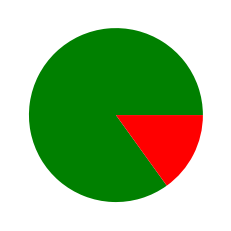

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

721 164


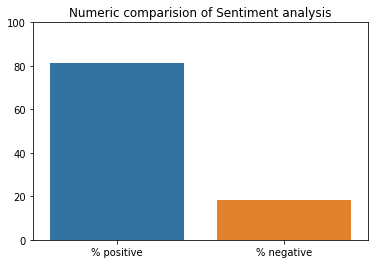

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

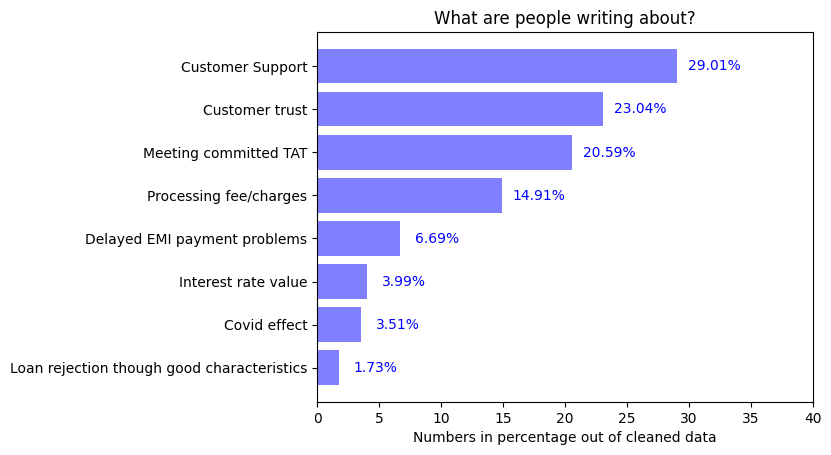

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[3.99,6.69,1.73,29.01,14.91,20.59,23.04,3.51]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,40)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

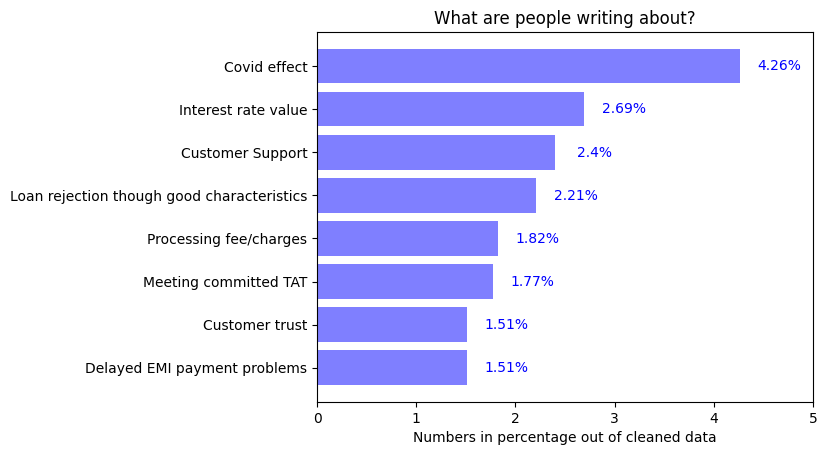

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[2.69,1.51,2.21,2.40,1.82,1.77,1.51,4.26]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,5)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()